In [2]:
#필요한 라이브러리 임포트
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV as gs

In [4]:
#데이터셋 읽기
stress = pd.read_csv('sleep_stress.csv')
stress_f = stress.copy()
stress_f.columns = ["snoring_rage", "respiration_rate", "body_temperature", "limb_movement_rate", "blood_oxygen_levels", "eye_movement", "number_of_hours_of_sleep", "heart_rate","Stress_Levels" ] 

In [5]:
#데이터프레임 좀 더 예쁘게 나오게끔 만들기 (피피티용)
def deco_table(styler):
    styler.set_properties(color="black", align="center")
    styler.set_properties(**{'background-color': 'AliceBlue',  'text-align':"center", 'font-family':"Times New Roman", 'border': '1px solid lightblue'})
    styler.format(precision=2)
    styler.set_table_styles(
    [{'selector': 'tr',
      'props': [('background-color', 'lightblue'), ('font-family', "Times New Roman")]}]
)     
    return styler
newtb = stress_f.head(15).style.pipe(deco_table)
newtb

,snoring_rage,respiration_rate,body_temperature,limb_movement_rate,blood_oxygen_levels,eye_movement,number_of_hours_of_sleep,heart_rate,Stress_Levels
0,93.80,25.68,91.84,16.60,89.84,99.60,1.84,74.20,3
1,91.64,25.10,91.55,15.88,89.55,98.88,1.55,72.76,3
2,60.00,20.00,96.00,10.00,95.00,85.00,7.00,60.00,1
3,85.76,23.54,90.77,13.92,88.77,96.92,0.77,68.84,3
4,48.12,17.25,97.87,6.50,96.25,72.48,8.25,53.12,0
5,56.88,19.38,95.38,9.38,94.06,83.44,6.38,58.44,1
6,47.00,16.80,97.20,5.60,95.80,68.00,7.80,52.00,0
7,50.00,18.00,99.00,8.00,97.00,80.00,9.00,55.00,0
8,45.28,16.11,96.17,4.22,95.11,61.12,7.11,50.28,0
9,55.52,19.10,95.10,9.10,93.66,82.76,6.10,57.76,1


In [6]:
stress_f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630 entries, 0 to 629
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   snoring_rage              630 non-null    float64
 1   respiration_rate          630 non-null    float64
 2   body_temperature          630 non-null    float64
 3   limb_movement_rate        630 non-null    float64
 4   blood_oxygen_levels       630 non-null    float64
 5   eye_movement              630 non-null    float64
 6   number_of_hours_of_sleep  630 non-null    float64
 7   heart_rate                630 non-null    float64
 8   Stress_Levels             630 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 44.4 KB


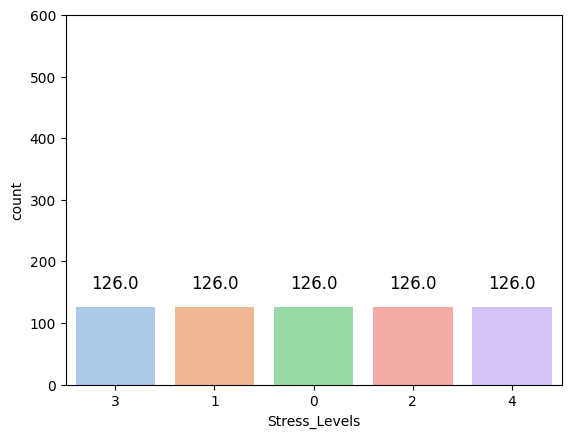

In [ ]:
ax = sns.countplot(x="Stress_Levels", data = stress_f, palette="pastel", order = stress_f['Stress_Levels'].value_counts().index)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 30, height, ha = 'center', size = 12)
ax.set_ylim(0, 600)
plt.show()

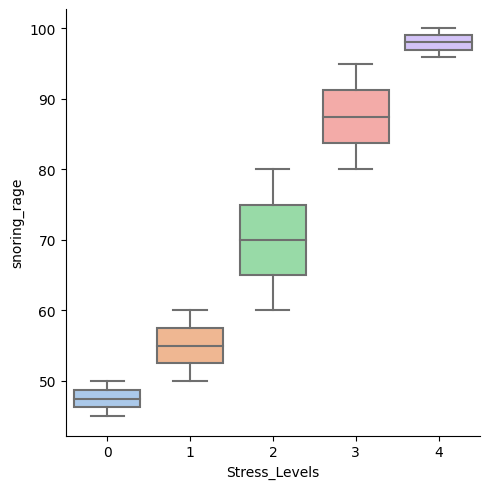

In [8]:
sns.catplot(data=stress_f, x="Stress_Levels", y="snoring_rage", kind="box", palette='pastel')
plt.show()

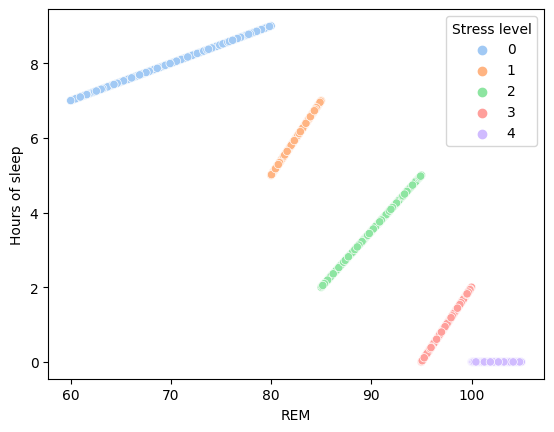

In [9]:
stress_f['body_temperature'] = (stress_f['body_temperature']-32)/1.8
stress_f.head()
ch = sns.scatterplot(data=stress, x="rem", y="sr.1", hue="sl", palette='pastel')
ch.set_xlabel('REM')
ch.set_ylabel('Hours of sleep')
plt.legend(title='Stress level')
plt.show()

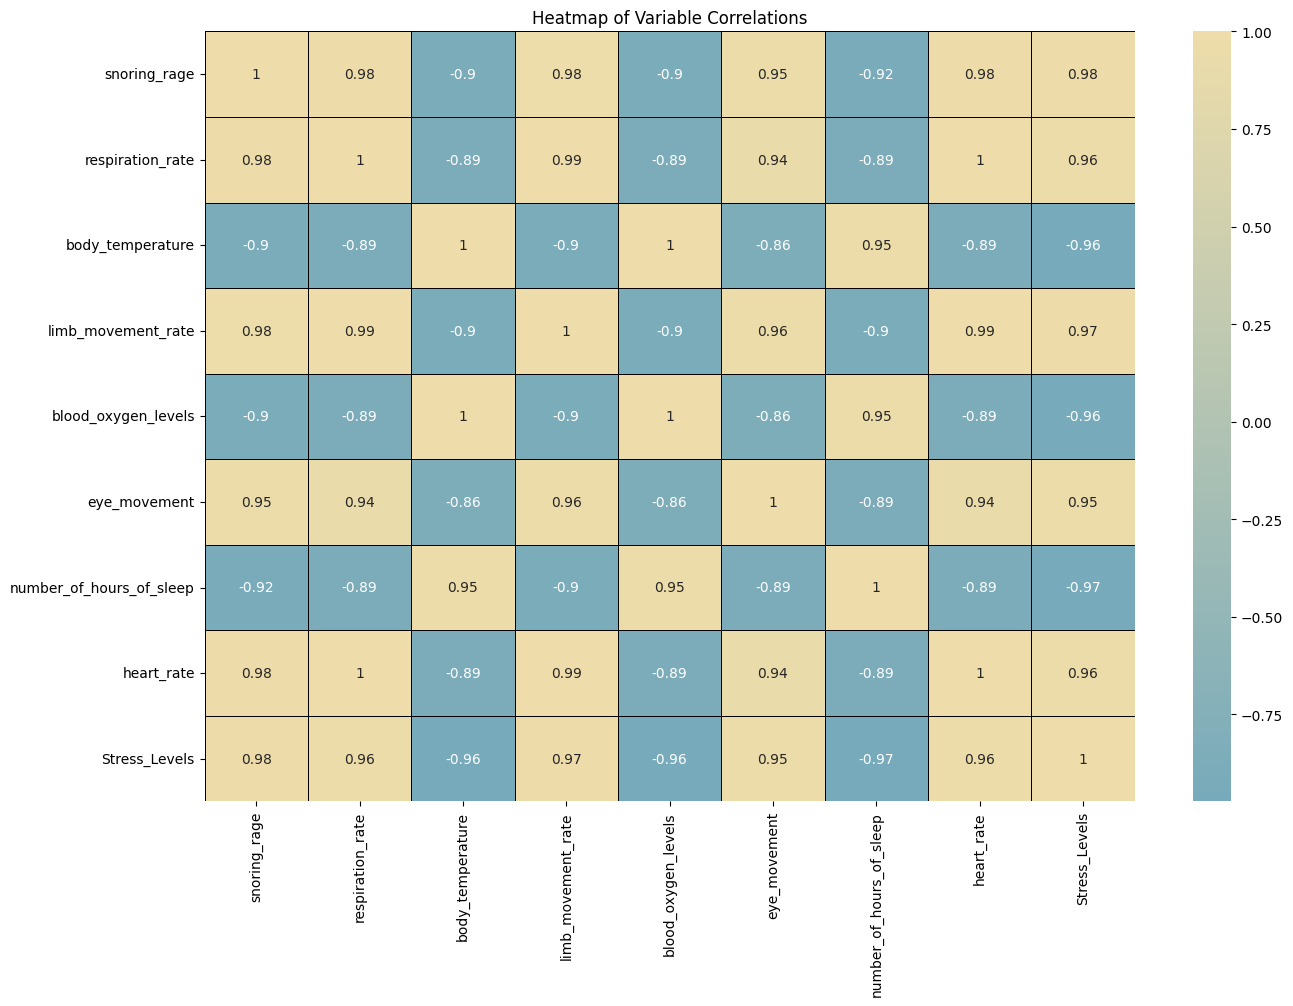

In [10]:
plt.figure(figsize=(15,10))
sns.heatmap(stress_f.corr(),cmap=sns.color_palette("blend:#7AB,#EDA", as_cmap=True), linewidths=0.5, linecolor="black", annot=True)
plt.title('Heatmap of Variable Correlations')
plt.show()

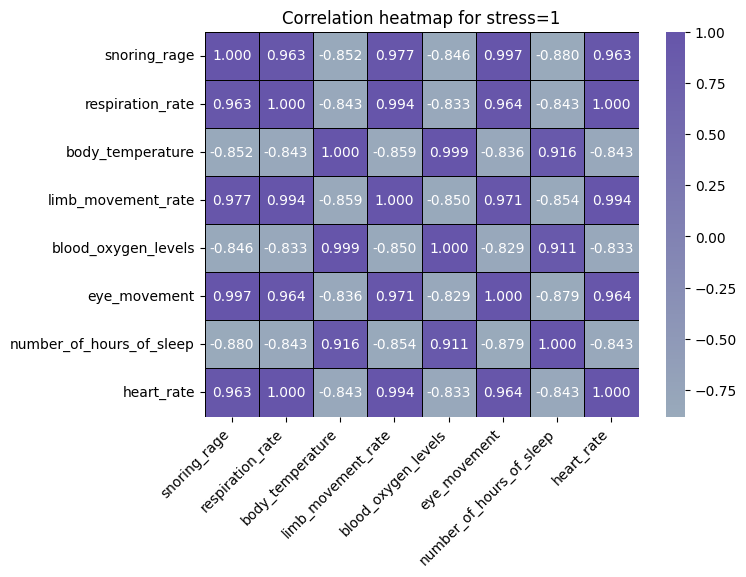

In [11]:
stress_f.loc[stress_f['Stress_Levels'] >=1, 'Stress_Levels'] = 1
stress_yes = stress_f[stress_f['Stress_Levels']==1]
stress_no = stress_f[stress_f['Stress_Levels']==0]
plt.figure(figsize = (7,5))
g = sns.heatmap(stress_yes.iloc[:,:-1].corr(), cmap=sns.color_palette("blend:#9AB,#65A", as_cmap=True), linewidths=0.5, linecolor="black", annot = True, fmt = '.3f')
g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title('Correlation heatmap for stress=1')
plt.show()

In [13]:
#목적 피처 이진화
stress_test=stress_f.copy()
stress_test.loc[stress_test['Stress_Levels'] >=1, 'Stress_Levels'] = 1
stress_test.head(15)

,snoring_rage,respiration_rate,body_temperature,limb_movement_rate,blood_oxygen_levels,eye_movement,number_of_hours_of_sleep,heart_rate,Stress_Levels
0,93.800,25.680,33.244444,16.600,89.840,99.60,1.840,74.20,1
1,91.640,25.104,33.084444,15.880,89.552,98.88,1.552,72.76,1
2,60.000,20.000,35.555556,10.000,95.000,85.00,7.000,60.00,1
3,85.760,23.536,32.648889,13.920,88.768,96.92,0.768,68.84,1
4,48.120,17.248,36.595556,6.496,96.248,72.48,8.248,53.12,0
5,56.880,19.376,35.208889,9.376,94.064,83.44,6.376,58.44,1
6,47.000,16.800,36.222222,5.600,95.800,68.00,7.800,52.00,0
7,50.000,18.000,37.222222,8.000,97.000,80.00,9.000,55.00,0
8,45.280,16.112,35.648889,4.224,95.112,61.12,7.112,50.28,0
9,55.520,19.104,35.057778,9.104,93.656,82.76,6.104,57.76,1


In [14]:
stress_test.describe()

,snoring_rage,respiration_rate,body_temperature,limb_movement_rate,blood_oxygen_levels,eye_movement,number_of_hours_of_sleep,heart_rate,Stress_Levels
count,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000
mean,71.600000,21.800000,33.777778,11.700000,90.900000,88.500000,3.700000,64.500000,0.800000
std,19.372833,3.966111,1.960939,4.299629,3.902483,11.893747,3.054572,9.915277,0.400318
min,45.000000,16.000000,29.444444,4.000000,82.000000,60.000000,0.000000,50.000000,0.000000
25%,52.500000,18.500000,32.500000,8.500000,88.500000,81.250000,0.500000,56.250000,1.000000
50%,70.000000,21.000000,33.888889,11.000000,91.000000,90.000000,3.500000,62.500000,1.000000
75%,91.250000,25.000000,35.277778,15.750000,94.250000,98.750000,6.500000,72.500000,1.000000
max,100.000000,30.000000,37.222222,19.000000,97.000000,105.000000,9.000000,85.000000,1.000000


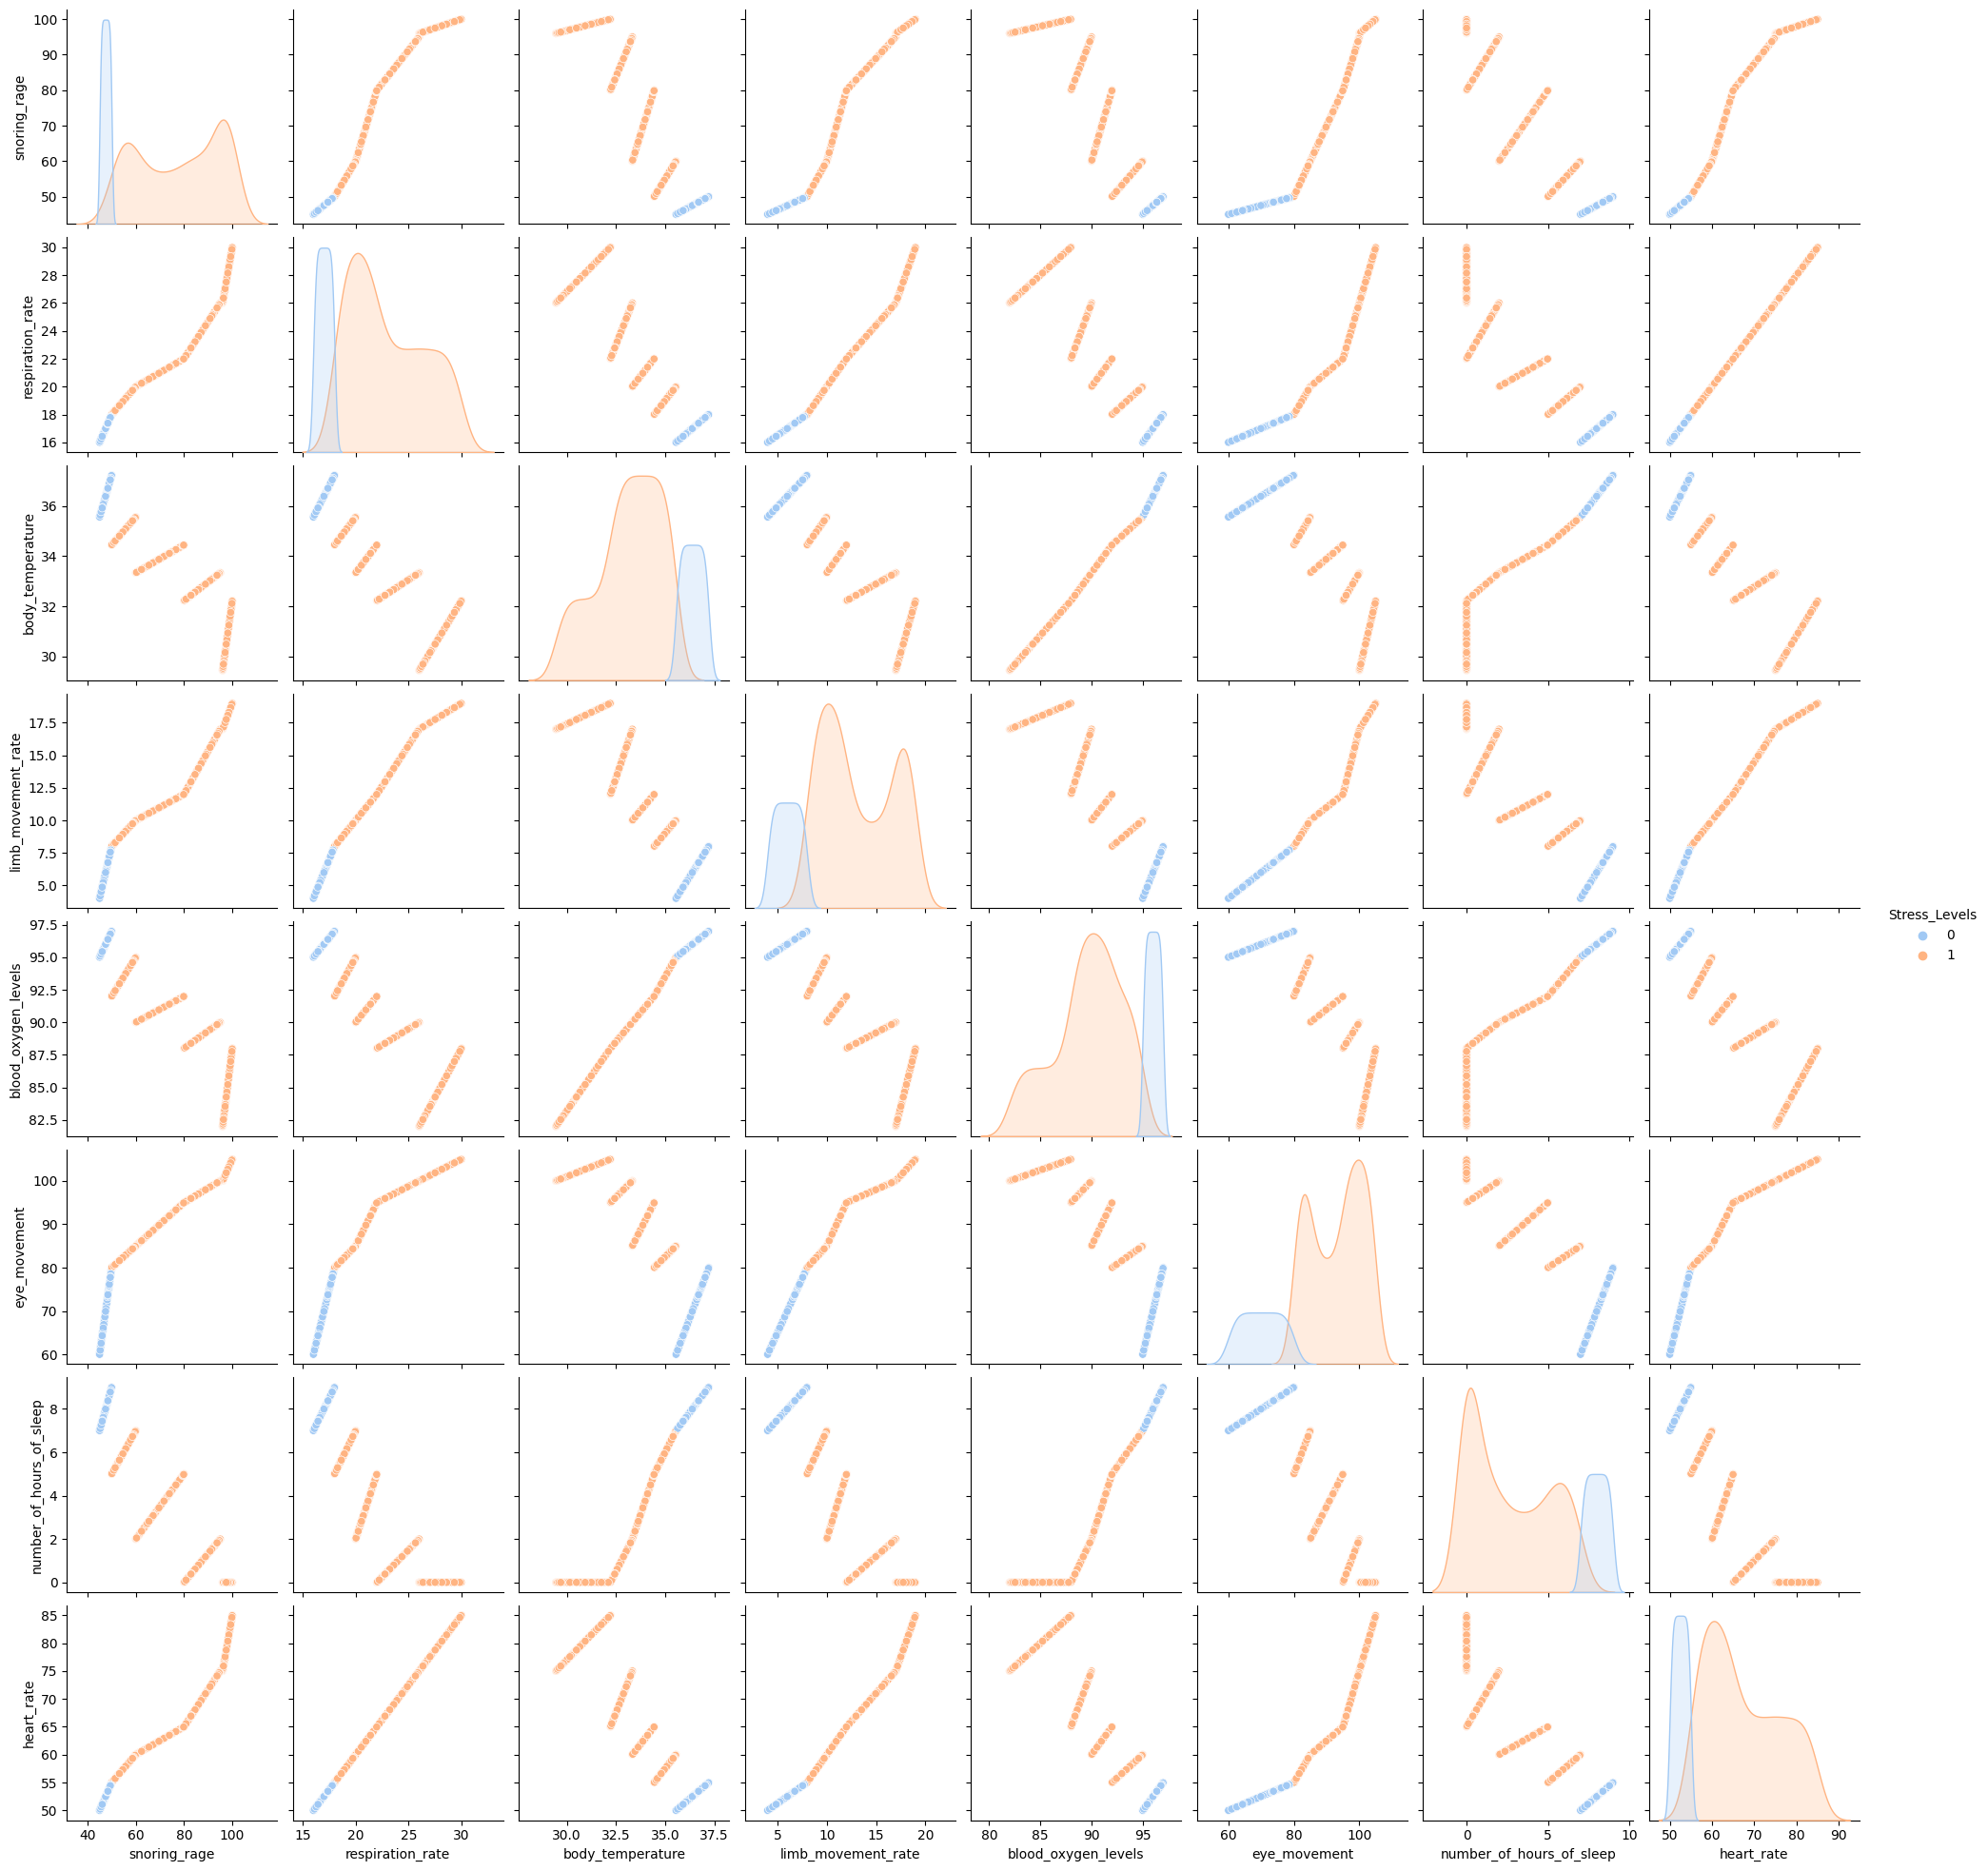

In [15]:
sns.pairplot(stress_test, hue='Stress_Levels', palette = 'pastel')

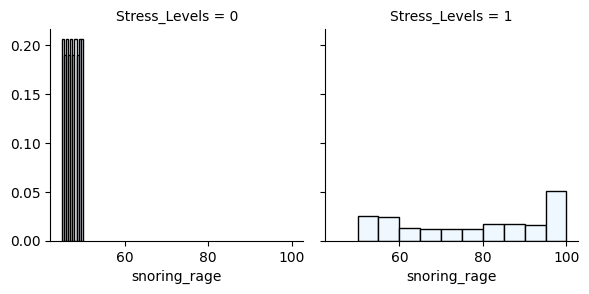

In [16]:
col = stress_test.columns[0]
g = sns.FacetGrid(stress_test, col = 'Stress_Levels')
g.map(plt.hist, col, bins=10, density=True, edgecolor='black', color='AliceBlue')
g.fig.subplots_adjust(top=0.9)
plt.show()

In [18]:
X = stress_test.iloc[:,:8]
Y = stress_test["Stress_Levels"]
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size=0.2,random_state = 42)

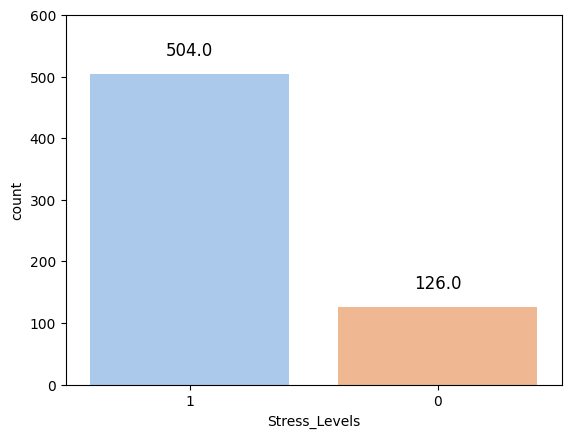

In [19]:

ax = sns.countplot(x="Stress_Levels", data = stress_test, palette="pastel", order = stress_test['Stress_Levels'].value_counts().index)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 30, height, ha = 'center', size = 12)
ax.set_ylim(0, 600)
plt.show()

In [20]:
#불균형 문제 해소
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.datasets import make_classification
from matplotlib import pyplot
from numpy import where
smote = SMOTE()
X = stress_test.iloc[:,:8]
Y = stress_test["Stress_Levels"]
x, y = smote.fit_resample(X, Y)
print(sorted(Counter(y).items()))
stress_b = pd.DataFrame(x, columns=x.columns)
stress_clue = y.to_frame()
# st = pd.concat([stress_b, stress_clue],join="outer")
st = stress_b.join(stress_clue)
st.head()

[(0, 504), (1, 504)]


,snoring_rage,respiration_rate,body_temperature,limb_movement_rate,blood_oxygen_levels,eye_movement,number_of_hours_of_sleep,heart_rate,Stress_Levels
0,93.80,25.680,33.244444,16.600,89.840,99.60,1.840,74.20,1
1,91.64,25.104,33.084444,15.880,89.552,98.88,1.552,72.76,1
2,60.00,20.000,35.555556,10.000,95.000,85.00,7.000,60.00,1
3,85.76,23.536,32.648889,13.920,88.768,96.92,0.768,68.84,1
4,48.12,17.248,36.595556,6.496,96.248,72.48,8.248,53.12,0


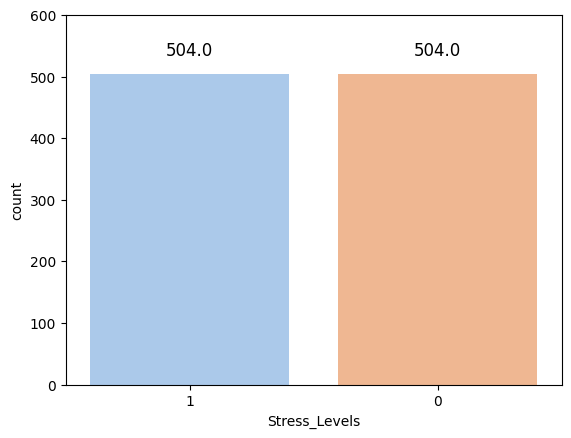

In [21]:
ax = sns.countplot(x="Stress_Levels", data = st, palette="pastel", order = st['Stress_Levels'].value_counts().index)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 30, height, ha = 'center', size = 12)
ax.set_ylim(0, 600)
plt.show()

<Axes: xlabel='snoring_rage', ylabel='respiration_rate'>

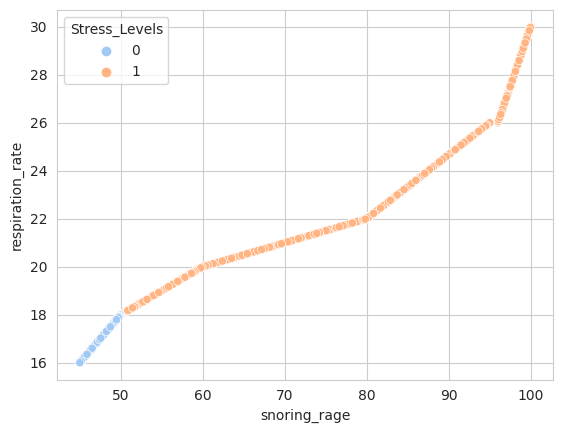

In [23]:
sns.set_style(style='whitegrid')
sns.scatterplot(data=st, x='snoring_rage', y='respiration_rate', hue='Stress_Levels',  palette='pastel')

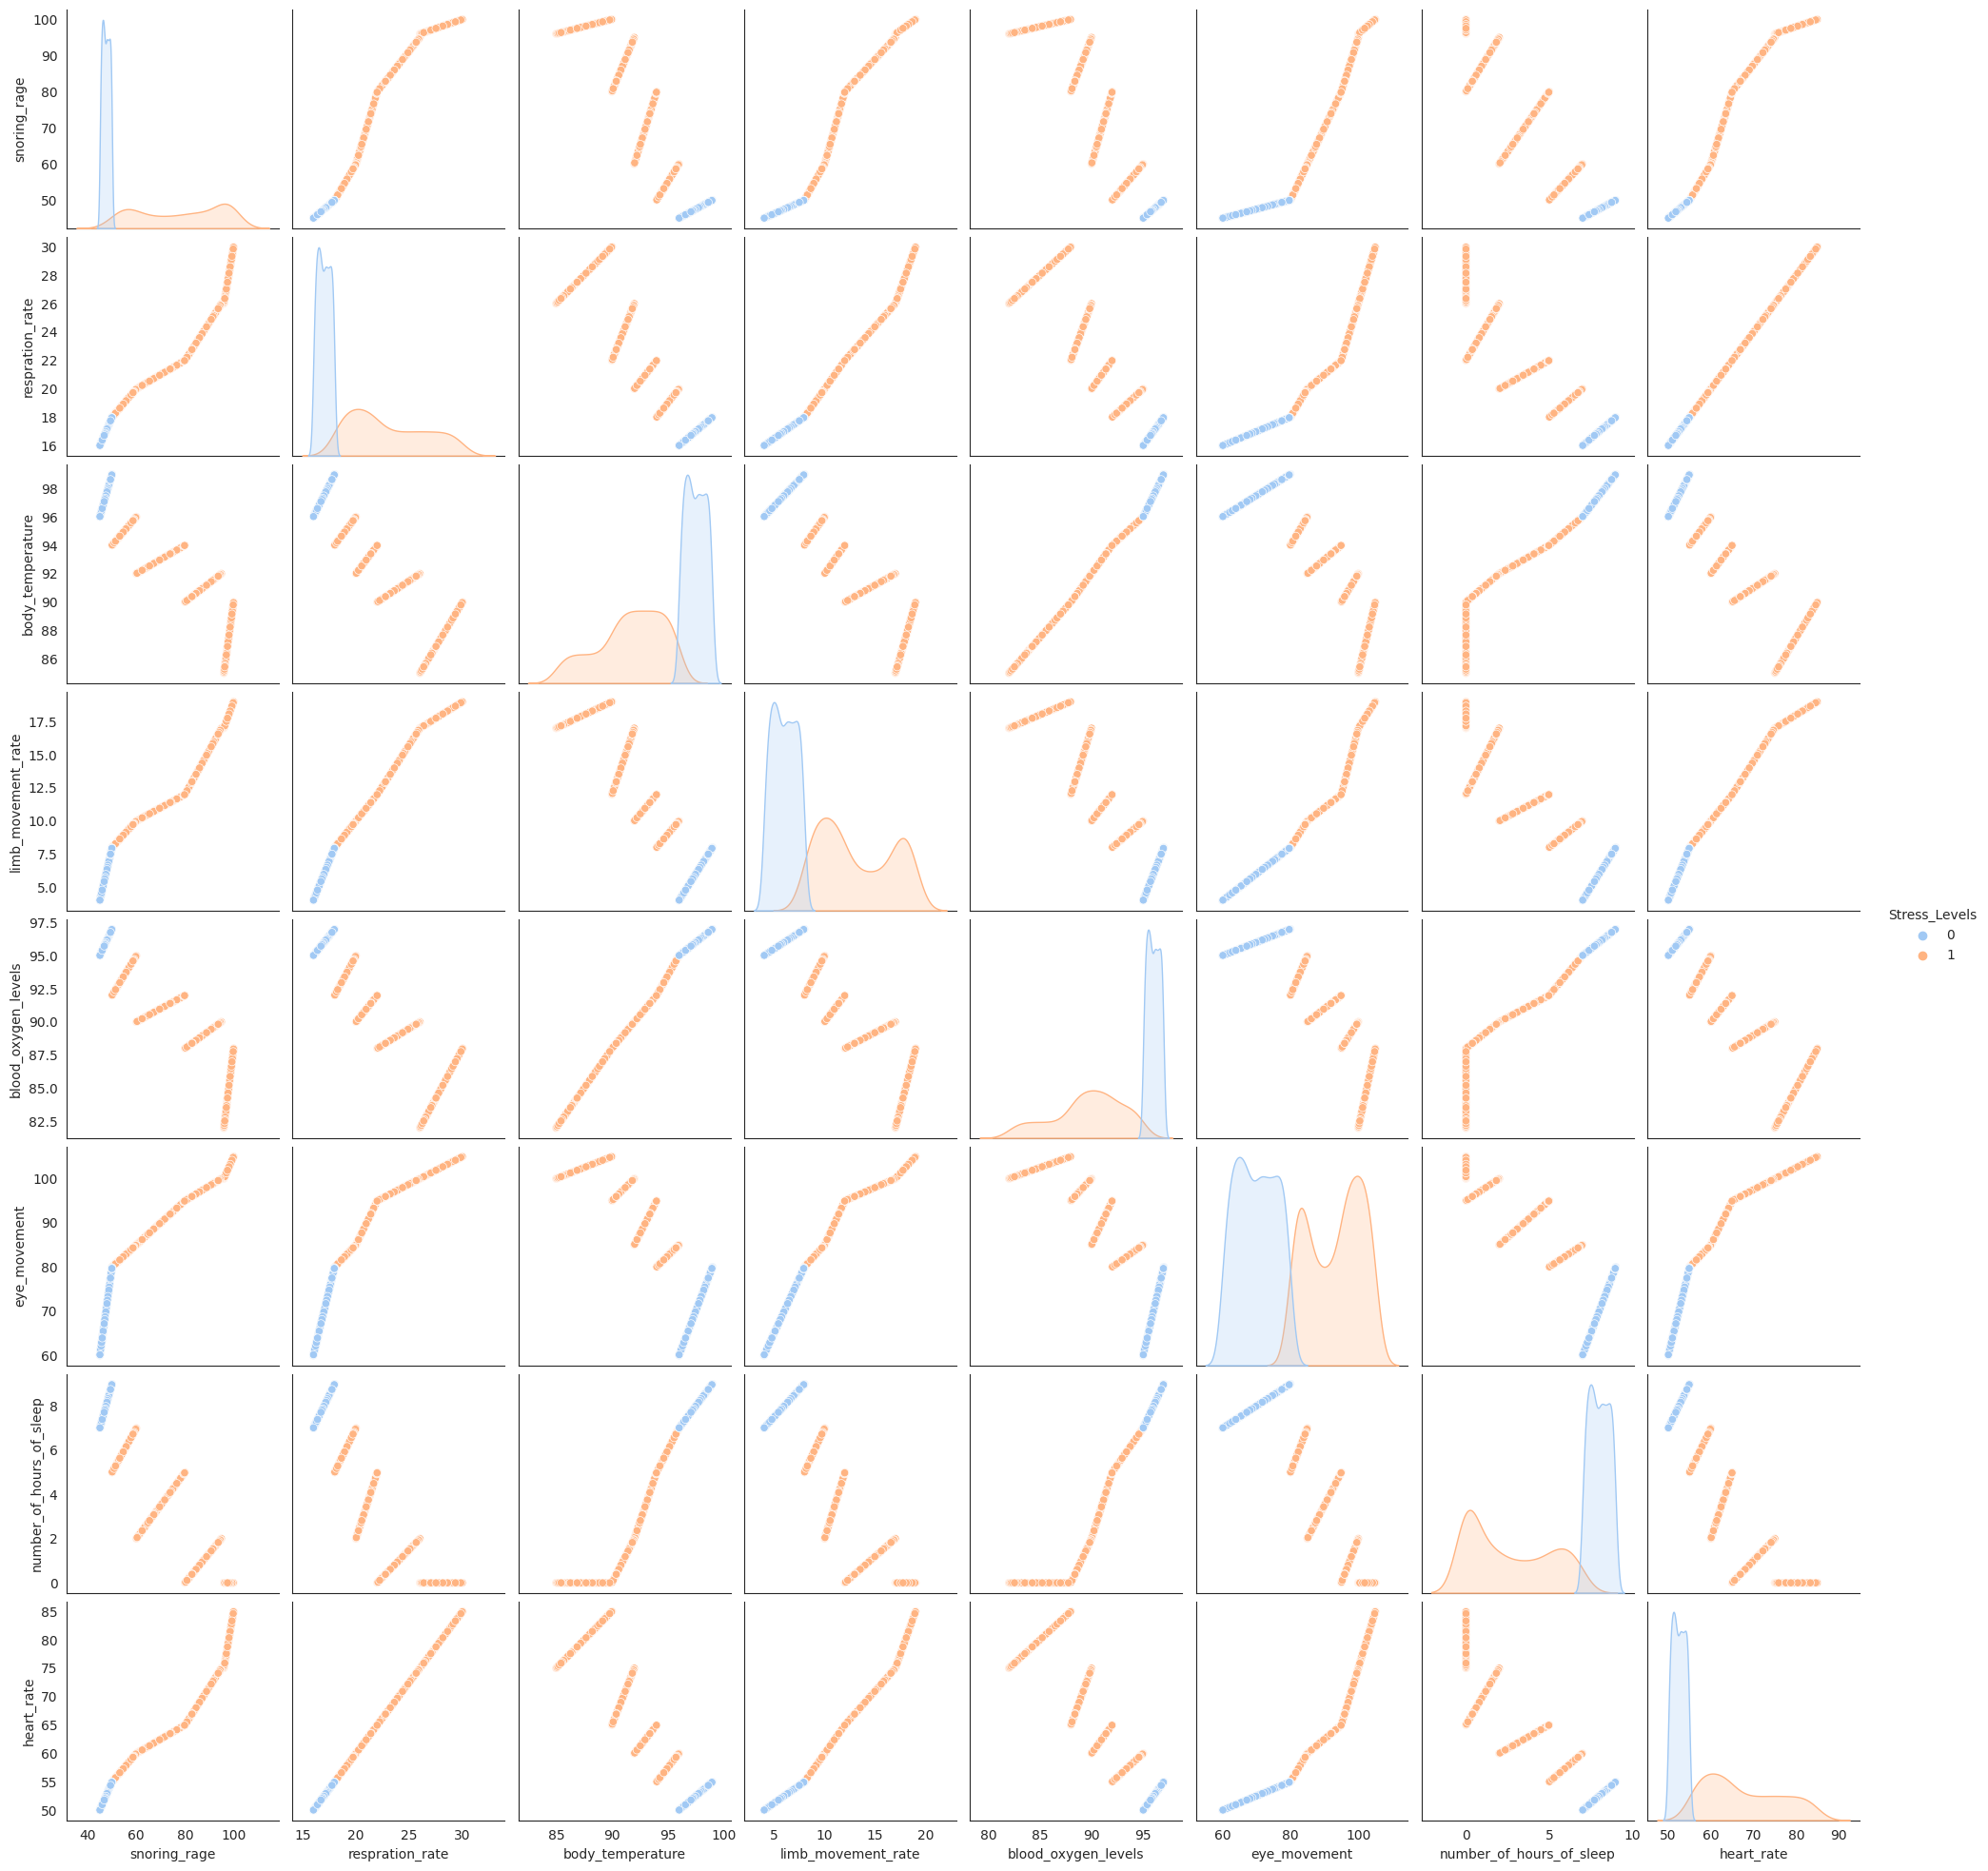

In [ ]:
sns.set_style(style='white')
sns.pairplot(st, hue='Stress_Levels', palette = 'pastel')

**데이터셋 변경**

데이터가 너무 균형 있게 나와서, 데이터에 노이즈에 넣고 좀 더 유위미한 결과를 얻고자 함

In [24]:
gen = st.copy()

In [25]:
gen.describe()

,snoring_rage,respiration_rate,body_temperature,limb_movement_rate,blood_oxygen_levels,eye_movement,number_of_hours_of_sleep,heart_rate,Stress_Levels
count,1008.000000,1008.000000,1008.000000,1008.000000,1008.000000,1008.000000,1008.000000,1008.000000,1008.000000
mean,62.564548,20.000819,34.757627,9.564139,92.813319,81.570693,5.313319,60.002048,0.500000
std,19.272884,3.918734,2.023448,4.436280,3.968713,13.473224,3.209511,9.796836,0.500248
min,45.000000,16.000000,29.444444,4.000000,82.000000,60.000000,0.000000,50.000000,0.000000
25%,47.472229,16.988892,33.333333,5.977783,90.000000,69.888917,2.000000,52.472229,0.000000
50%,50.000000,18.000000,35.555556,8.000000,95.000000,80.000000,7.000000,55.000000,0.500000
75%,80.000000,22.000000,36.378920,12.000000,95.988038,95.000000,7.988038,65.000000,1.000000
max,100.000000,30.000000,37.222222,19.000000,97.000000,105.000000,9.000000,85.000000,1.000000


In [26]:
#Two-by-four array of samples from the normal distribution with mean 3 and standard deviation 2.5:
# random_mean = [60, 19.8, 94.5, 9.5, 92, 81, 5.3, 59.9 ]
random_std=[18, 4, 3.6, 4.45, 3.9, 13.6, 3.19, 9.8]
gen_upd=gen.sample(254).index
for col, beta in zip(gen.columns, random_std):
  if col=='eye_movement': continue
  a = beta * np.random.randn(254)
  gen.loc[gen_upd, col]=gen.loc[gen_upd, col]+a
  
# gen.loc[gen_upd, 'snoring_rage']=gen.loc[gen_upd, 'snoring_rage']+a
# st.loc[st['snoring_rage']][sample]


<Axes: xlabel='Stress_Levels', ylabel='snoring_rage'>

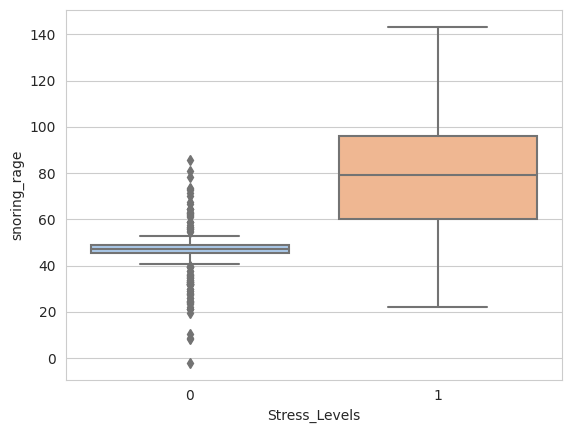

In [27]:
sns.boxplot(y=gen['snoring_rage'],x=gen["Stress_Levels"], palette='pastel')

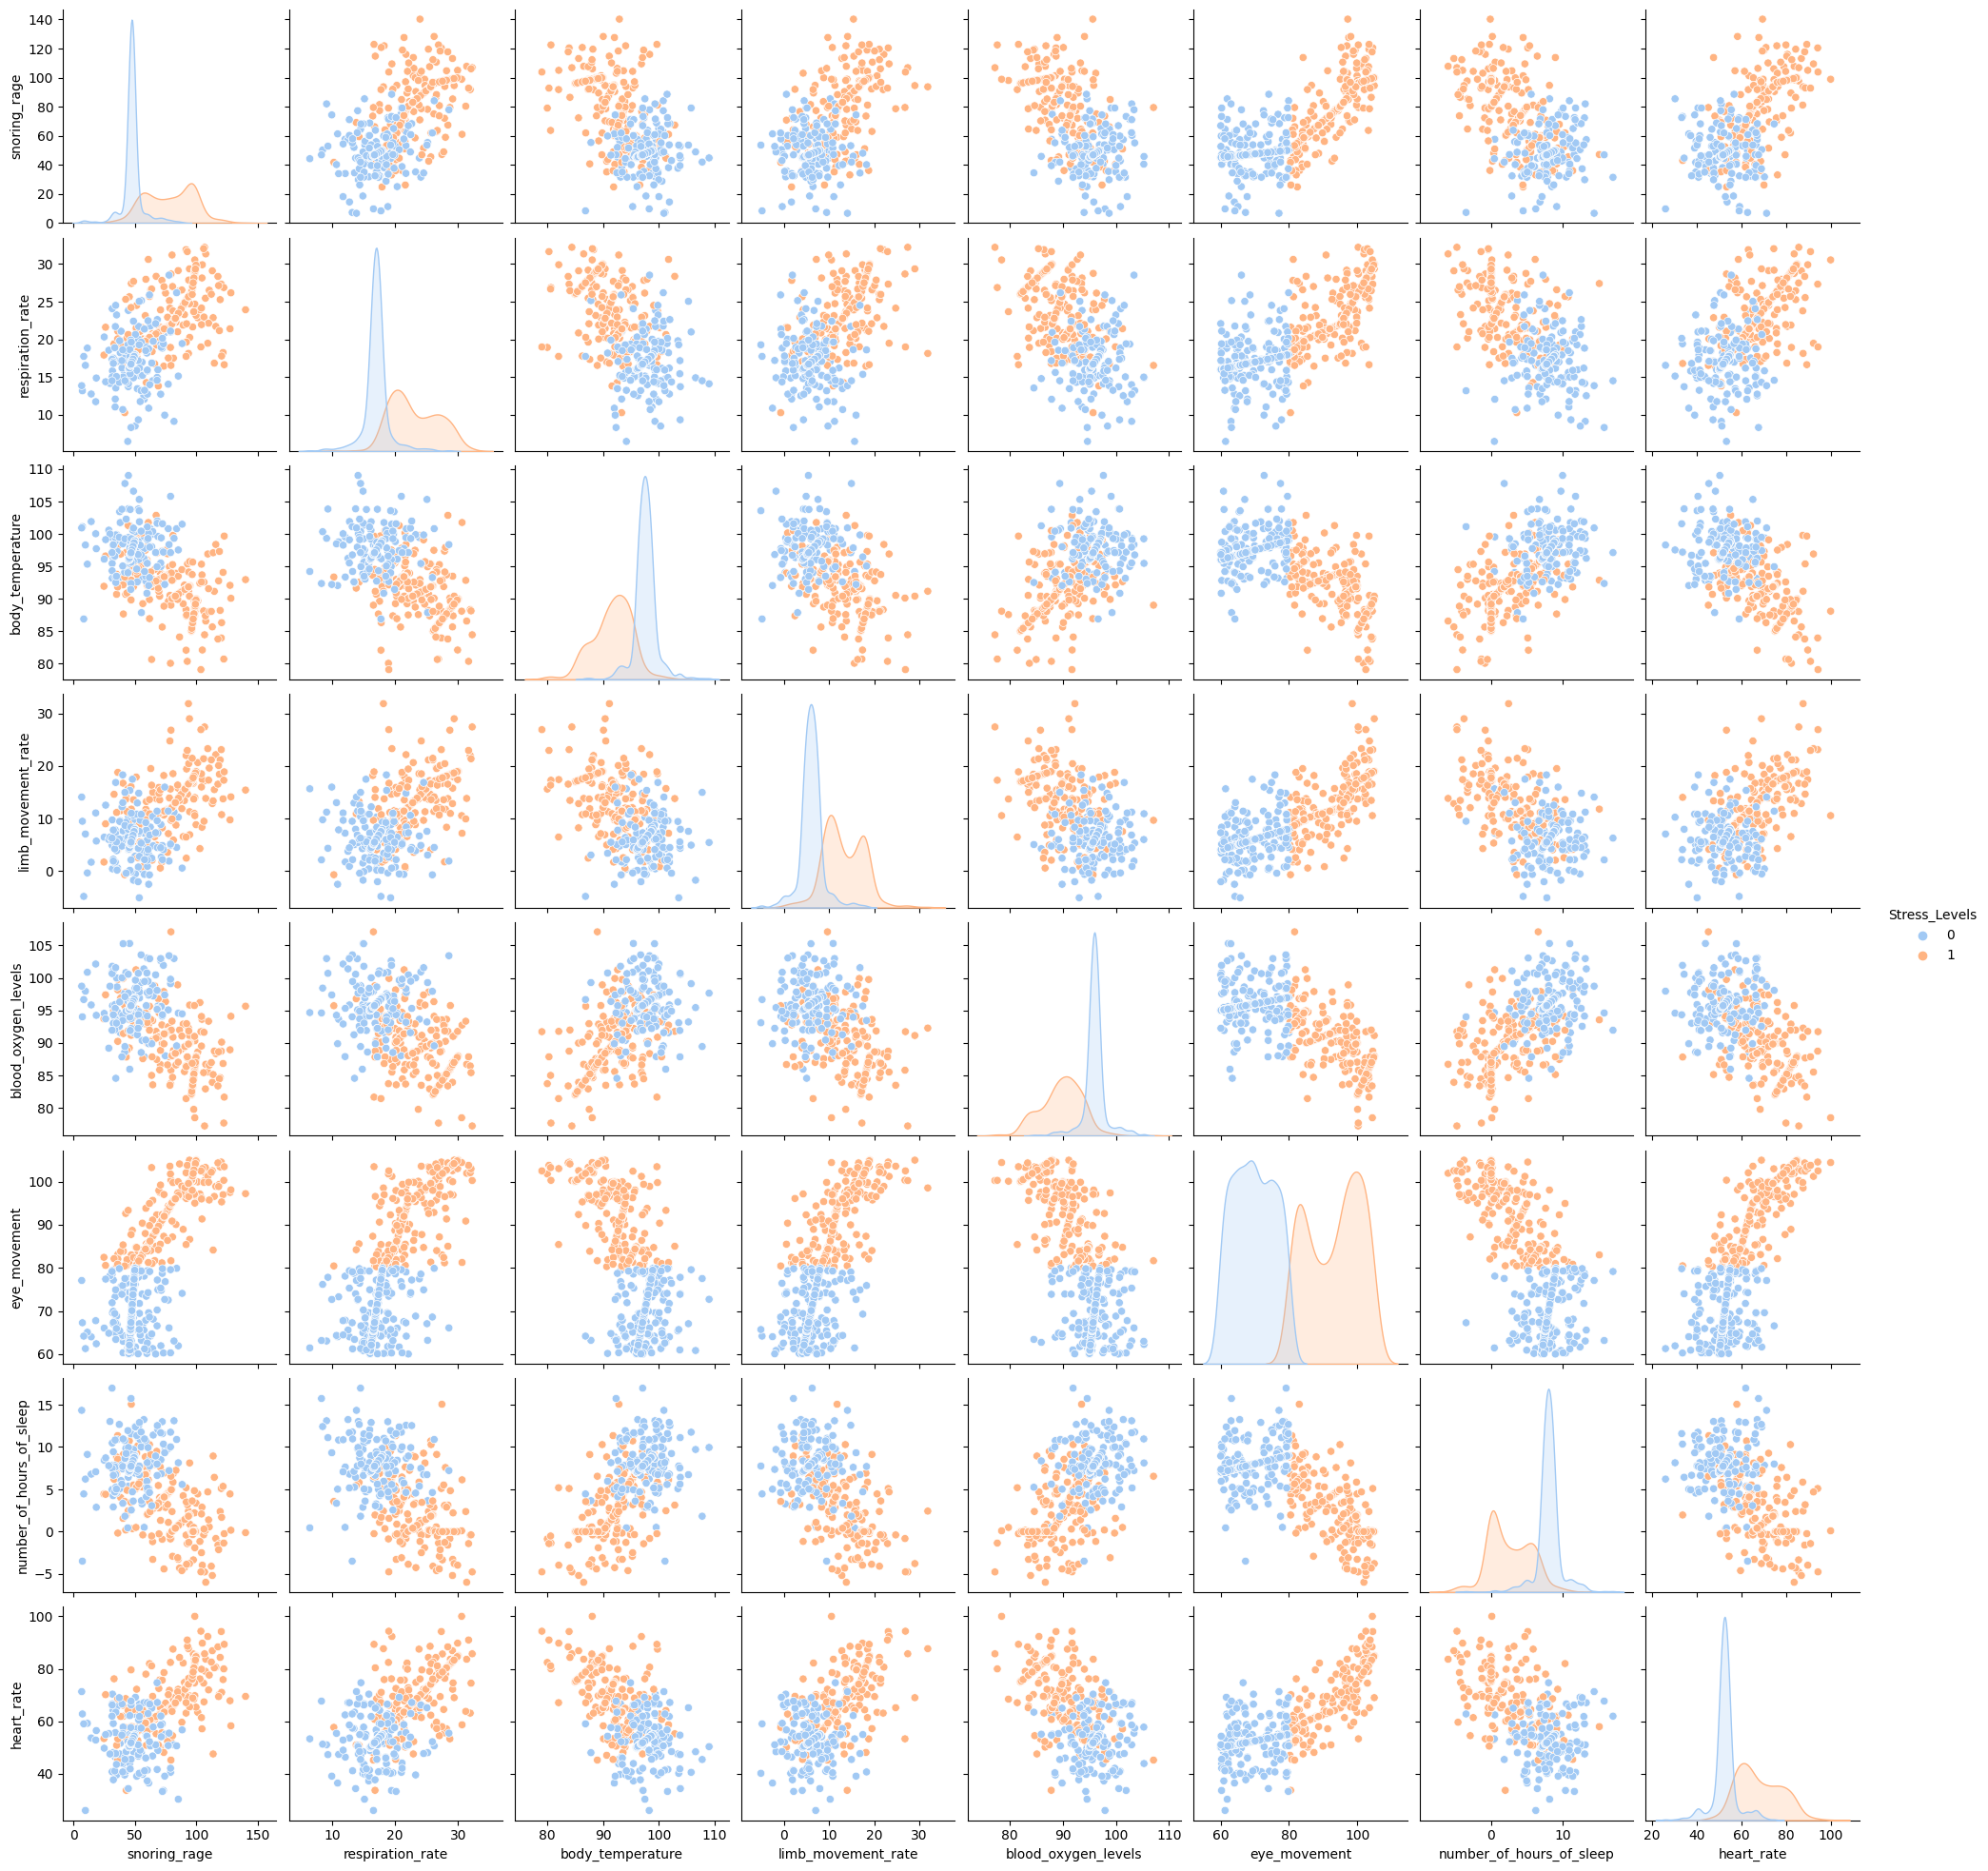

In [ ]:
sns.pairplot(gen, hue='Stress_Levels', palette = 'pastel')

In [28]:
rfc_best=RandomForestClassifier(criterion='gini',n_estimators=500, max_depth=5, min_samples_split=2, min_samples_leaf=1, max_features="sqrt",  random_state=42).fit(xtrain, ytrain)

Area Under the Curve (AUC):  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        93
           1       1.00      1.00      1.00       109

    accuracy                           1.00       202
   macro avg       1.00      1.00      1.00       202
weighted avg       1.00      1.00      1.00       202



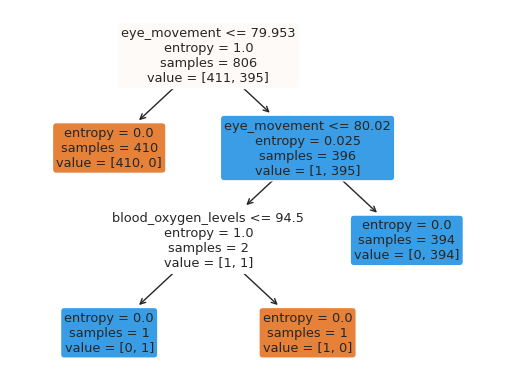

In [30]:
#Decision tree
from sklearn.metrics import classification_report, roc_curve, auc

X = gen.iloc[:,:8]
Y = gen["Stress_Levels"]
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size=0.2)
treee = sklearn.tree.DecisionTreeClassifier(criterion="entropy")
treee.fit(xtrain, ytrain)
feat = ["snoring_rage", "respiration_rate", "body_temperature", "limb_movement_rate", "blood_oxygen_levels", "eye_movement", "number_of_hours_of_sleep", "heart_rate"]

out = sklearn.tree.plot_tree(treee, feature_names=X.columns, filled=True, rounded=True)
Y_pred=treee.predict(xtest)
fpr, tpr, thresholds = roc_curve(ytest, Y_pred)
print("Area Under the Curve (AUC): ",auc(fpr, tpr))
print(classification_report(ytest, Y_pred))

발표 자료상 성능 평가와 코드 파일상 성능 평가 차이가 발생하는 이유는, 발표했을 때 원래 데이터를 가지고 성능 평가를 해보았지만, 이 파일에는 노이즈로 augment된 데이터 기반으로 수행했기 때문입니다.

In [33]:
# naive bayes, log. reg, k-nn, rand forest, grad boost
#xtrain,xtest,ytrain,ytest
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from pandas.core.common import random_state

models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))
models.append(('LR', LogisticRegression()))
models.append(('GB', GradientBoostingClassifier()))
results = []
names = []

for name, model in models:
  model.fit(xtrain, ytrain)
  Y_pred=model.predict(xtest)
  fpr, tpr, thresholds = roc_curve(ytest, Y_pred)
  print(f"========================={name}=================================")
  print("Area Under the Curve (AUC): ",auc(fpr, tpr))
  print(classification_report(ytest, Y_pred))
   

=========================KNN=================================
Area Under the Curve (AUC):  0.9900364999506758
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        93
           1       0.99      0.99      0.99       109

    accuracy                           0.99       202
   macro avg       0.99      0.99      0.99       202
weighted avg       0.99      0.99      0.99       202

=========================NB=================================
Area Under the Curve (AUC):  0.8791555687086909
              precision    recall  f1-score   support

           0       0.79      0.98      0.88        93
           1       0.98      0.78      0.87       109

    accuracy                           0.87       202
   macro avg       0.88      0.88      0.87       202
weighted avg       0.89      0.87      0.87       202

=========================LR=================================
Area Under the Curve (AUC):  0.9954128440366973
              prec

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Area Under the Curve (AUC):  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        93
           1       1.00      1.00      1.00       109

    accuracy                           1.00       202
   macro avg       1.00      1.00      1.00       202
weighted avg       1.00      1.00      1.00       202



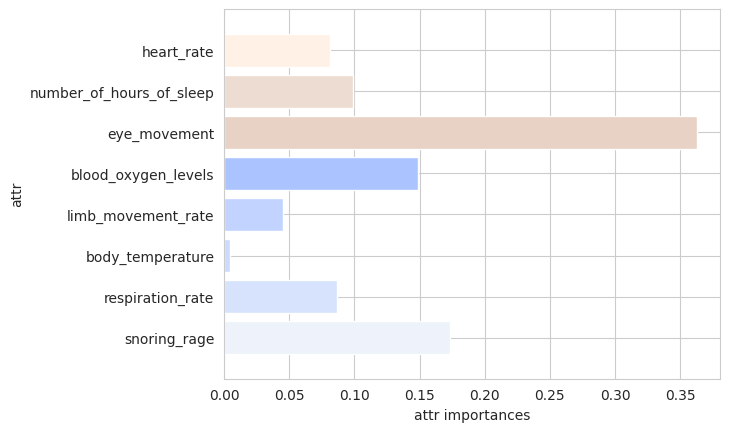

In [37]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=20, oob_score=True, \
                            criterion='gini', max_depth=5, random_state=42)

rfc.fit(xtrain, ytrain)
Y_pred=treee.predict(xtest)
fpr, tpr, thresholds = roc_curve(ytest, Y_pred)
  
print("Area Under the Curve (AUC): ", auc(fpr, tpr))
print(classification_report(ytest, Y_pred))
def plot_feature_importances(model):
    n_features = X.shape[1]
    colors = ['#edf2fb','#d7e3fc','#ccdbfd','#c1d3fe','#abc4ff', '#e8d1c5','#eddcd2', '#fff1e6']
    plt.barh(feat, model.feature_importances_, align='center', color=colors)
    plt.yticks(np.arange(n_features))
    plt.xlabel("attr importances")
    plt.ylabel("attr")
    plt.ylim(-1, n_features)

plot_feature_importances(rfc)
plt.show()

In [ ]:
import graphviz 

In [ ]:
a = st.columns.values.tolist()
a

['snoring_rage',
 'respiration_rate',
 'body_temperature',
 'limb_movement_rate',
 'blood_oxygen_levels',
 'eye_movement',
 'number_of_hours_of_sleep',
 'heart_rate',
 'Stress_Levels']

In [ ]:
def colorDT(clf):
  def make_col(tree, node):
    if tree.tree_.value[node][0][0]>tree.tree_.value[node][0][1]:
      col="#e68938"
    elif tree.tree_.value[node][0][0]==tree.tree_.value[node][0][1]:
      col="grey"
    else:
      col="#00bfff"
    return col
#define edge colors
  def make_col_edge(node, right=True):
    if not right:
      if (clf.tree_.value[clf.tree_.children_left[i]][0][0]/(clf.tree_.value[clf.tree_.children_left[i]][0][0]+clf.tree_.value[clf.tree_.children_left[i]][0][1])) > clf.tree_.value[i][0][0]/(clf.tree_.value[i][0][0]+clf.tree_.value[i][0][1]):
        col="red"
      else:
        col="blue"
    if right:
      if (clf.tree_.value[clf.tree_.children_right[i]][0][0]/(clf.tree_.value[clf.tree_.children_right[i]][0][0]+clf.tree_.value[clf.tree_.children_right[i]][0][1])) > clf.tree_.value[i][0][0]/(clf.tree_.value[i][0][0]+clf.tree_.value[i][0][1]):
        col="red"
      else:
        col="blue"
    return col
  Tree = graphviz.Graph('tree', format='svg') 
  Tree.edge_attr.update(dir="forward")
  Tree.edge_attr.update(arrowhead="vee")
  Tree.node_attr.update(shape="cylinder")
  node = clf.tree_.node_count
  nodes=np.arange(0, node, 1)
  for i in nodes:
    parent = f'{feat[clf.tree_.feature[i]]}<={round(clf.tree_.threshold[i],3)}\nentropy={round(clf.tree_.impurity[i],3)}\nvalue={clf.tree_.value[i][0]}'
  # node(parent, color='#E68938')
  ####################left!!!
    if clf.tree_.children_left[i]!=-1:
      if clf.tree_.children_left[clf.tree_.children_left[i]]!=-1:
          left = f'{feat[clf.tree_.feature[clf.tree_.children_left[i]]]}<={round(clf.tree_.threshold[clf.tree_.children_left[i]],3)}\nentropy={round(clf.tree_.impurity[clf.tree_.children_left[i]],3)}\nvalue={clf.tree_.value[clf.tree_.children_left[i]][0]}'
      else: 
        left = f'entropy={round(clf.tree_.impurity[clf.tree_.children_left[i]],3)}\nvalue={clf.tree_.value[clf.tree_.children_left[i]][0]}'
        Tree.node(left, style='filled', color=make_col(clf, clf.tree_.children_left[i]), shape='rect')
      if clf.tree_.impurity[i]>clf.tree_.impurity[clf.tree_.children_left[i]]:
        Tree.node(parent, style='filled', color=make_col(clf, i))
        Tree.edge(parent, left, color=make_col_edge(i,right=False))
        Tree.edge(parent, left, color=make_col_edge(i,right=False))
      else:
        Tree.node(parent, style='filled', color=make_col(clf, i))
        Tree.edge(parent, left, color=make_col_edge(i,right=False))
    if clf.tree_.children_right[i]!=-1:
      if clf.tree_.children_left[clf.tree_.children_right[i]]!=-1:
        right = f'{feat[clf.tree_.feature[clf.tree_.children_right[i]]]}<={round(clf.tree_.threshold[clf.tree_.children_right[i]],3)}\nentropy={round(clf.tree_.impurity[clf.tree_.children_right[i]],3)}\nvalue={clf.tree_.value[clf.tree_.children_right[i]][0]}'
      else: 
        right = f'entropy={round(clf.tree_.impurity[clf.tree_.children_right[i]],3)}\nvalue={clf.tree_.value[clf.tree_.children_right[i]][0]}'
        Tree.node(right, style='filled', color=make_col(clf, clf.tree_.children_right[i]), shape='rect')
      if clf.tree_.impurity[i]>clf.tree_.impurity[clf.tree_.children_right[i]]:
        Tree.edge(parent, right, color=make_col_edge(i,right=True))
        Tree.edge(parent, right, color=make_col_edge(i,right=True))
      else:
        Tree.edge(parent, right, color=make_col_edge(i,right=True))
  return Tree

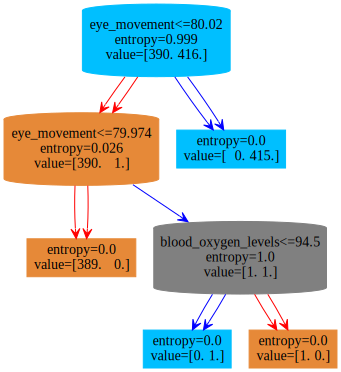

In [ ]:
a = colorDT(treee)
a